In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Demorou ~40 mins. a gerar os ~4000 gráficos!

In [3]:
%matplotlib widget

In [3]:
# Reading file '00038.txt':
df = pd.read_fwf(filepath_or_buffer = 'Dados citómetro/D1_5ul/00038.txt', header = None, usecols = [0, 1, 2],
    names = ['t', 's1', 's2'], engine = 'c', dtype =  {'t': np.float32, 's1': np.float32, 's2': np.float32})

# y values for sensor 1:
Real_y = df['s1'].to_numpy()

# Doing this so the values are centered in 0:
Real_y -= np.mean(Real_y)

# t values:
Real_t = df['t'].to_numpy()

In [4]:
# Neural network implementation:

# Load the dataset
dataset = loadtxt('file4.csv', delimiter=',')

In [5]:
# Split into input (X) and output (y) variables
X = dataset[:,0:1000]
y = dataset[:,1000]
y, X = shuffle(y ,X)

# Trying to use a scaler:
# scaler = MinMaxScaler()
# scaled_X = scaler.fit_transform(X)

# Define the keras model
model = Sequential()
model.add(Dense(501, input_dim=1000, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(501, activation='relu'))
model.add(Dropout(rate=0.2))               # Changed 0.4 to 0.2 for testing.

# model.add(Dense(501, activation='relu')) # For some reason, once I commented these lines,
# model.add(Dropout(rate=0.4))             # the accuracy increased for file4.csv

# model.add(Dense(501, activation='relu'))
# model.add(Dropout(rate=0.1))

model.add(Dense(501, activation='relu'))
model.add(Dropout(rate=0.1))

model.add(Dense(1, activation='sigmoid'))

# model.summary()

In [6]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae','acc','mse']) # Change loss to 'mae'?

# Fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=100)
# model.fit(scaled_X, y, epochs=150, batch_size=100) # Using scaler.

# Evaluate the keras model
_, mae, accuracy, mse = model.evaluate(X, y)
# _, mae, accuracy, mse = model.evaluate(scaled_X, y) # Using scaler.
print(f'Accuracy = {accuracy*100}%')

Epoch 1/150
97/97 [==============================] - 2s 9ms/step - loss: 0.6938 - mae: 0.5002 - acc: 0.4996 - mse: 0.2503
Epoch 2/150
97/97 [==============================] - 1s 9ms/step - loss: 0.6932 - mae: 0.5000 - acc: 0.4987 - mse: 0.2500
Epoch 3/150
97/97 [==============================] - 1s 9ms/step - loss: 0.6932 - mae: 0.5000 - acc: 0.4970 - mse: 0.2500
Epoch 4/150
97/97 [==============================] - 1s 9ms/step - loss: 0.6932 - mae: 0.5000 - acc: 0.4945 - mse: 0.2500
Epoch 5/150
97/97 [==============================] - 1s 11ms/step - loss: 0.6932 - mae: 0.5000 - acc: 0.5015 - mse: 0.2500
Epoch 6/150
97/97 [==============================] - 1s 11ms/step - loss: 0.6932 - mae: 0.5000 - acc: 0.4989 - mse: 0.2500
Epoch 7/150
97/97 [==============================] - 1s 10ms/step - loss: 0.6931 - mae: 0.4999 - acc: 0.4961 - mse: 0.2500
Epoch 8/150
97/97 [==============================] - 1s 10ms/step - loss: 0.6922 - mae: 0.4991 - acc: 0.5147 - mse: 0.2495
Epoch 9/150
97/97 [=

In [7]:
# We will need to evaluate every 1000 points of the signal!
X_Real = []
for i in range(0, len(Real_t) - 1000):
    x_Real = Real_y[i:(i+1000)]
    X_Real.append(x_Real)
    # print(i)
X_Real = np.array(X_Real)

predictions = model.predict(X_Real)
# predictions = model.predict(X) # Testing for X instead of X_Real.

[Text(0.5, 0, 'Points'), Text(0, 0.5, 'Probability of peak')]

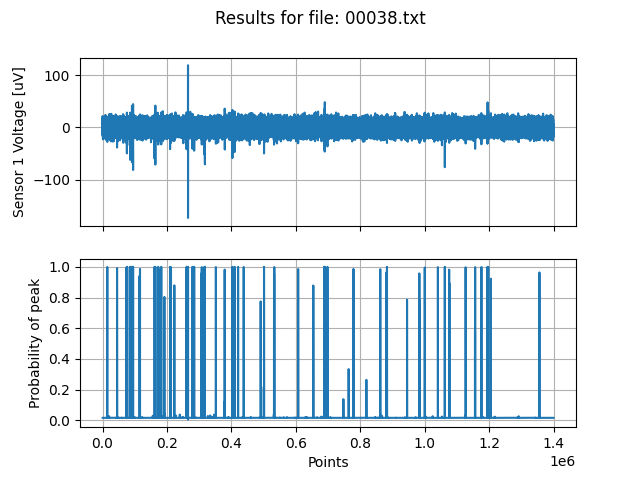

In [35]:
%matplotlib widget
# NN_t = np.linspace(Real_t[0] + (1000* 5e-6), Real_t[-1000], len(Real_t) - 1000)
# NN_t = np.linspace(0, len(X), len(X)) # Testing for X instead of X_Real.
NN_t = list(range(0, len(predictions)))
# print(len(NN_t))

# Graphing results:
# plt.figure(3)
# plt.clf()
# plt.grid(True)
# plt.ylabel('Probability')
# # plt.xlabel('Time [s]')
# plt.xlabel('Points') # Testing for X instead of X_Real.
# plt.title('Neural network prediction')
# plt.plot(NN_t, predictions)
# plt.show()

# Plotting:
fig1, axes1 = plt.subplots(2, 1, sharex=True)
axes1[0].plot(NN_t, Real_y[:-1000]*1e6)
axes1[1].plot(np.array(NN_t) + 500, predictions)

fig1.suptitle('Results for file: 00038.txt')

axes1[0].grid(True)
axes1[0].set(ylabel = 'Sensor 1 Voltage [uV]')

axes1[1].grid(True)
axes1[1].set(xlabel = 'Points', ylabel = 'Probability of peak')

In [9]:
# Might need to change the particles' velocity for greater values in 'trues'!
# Escalador?

[Text(0.5, 0, 'Points'), Text(0, 0.5, 'Probability of peak')]

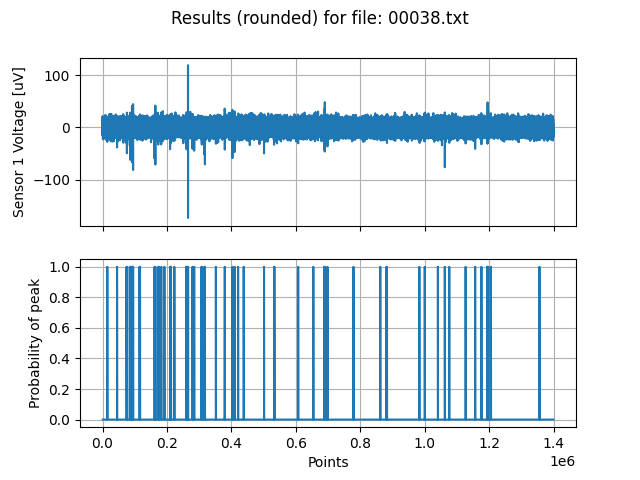

In [36]:
# Considering > 0.8 as a peak!
# Plotting:
fig2, axes2 = plt.subplots(2, 1, sharex=True)
axes2[0].plot(NN_t, Real_y[:-1000]*1e6)
axes2[1].plot(np.array(NN_t) + 500, (predictions > 0.8).astype(int))

fig2.suptitle('Results (rounded) for file: 00038.txt')

axes2[0].grid(True)
axes2[0].set(ylabel = 'Sensor 1 Voltage [uV]')

axes2[1].grid(True)
axes2[1].set(xlabel = 'Points', ylabel = 'Probability of peak')

In [31]:
# Counting the number of peaks detected by neural network:
rounded_predictions = (predictions > 0.8).astype(int)

flag = [False, False]
peak_counter = 0
for i in rounded_predictions:
    if(i==1):
        if(not(flag[1])):
            flag[1] = True
        elif(not(flag[0])):
            flag[0] = True
    if(i==0):
        if(flag[1]):
            flag[1] = False
        elif(flag[0]):
            flag[0] = False
    if(flag == [True, False]):
        peak_counter+=1
print(f'Detected {peak_counter} particles.')

Detected 69 particles.


Extracting previous information. These were `widget`s. The problem is that I lost access to the training data (and cytometer data), so I cannot retrain the model. So, I try to recover the information from the `widget`s.

(2,
 [{'cell_type': 'code',
   'execution_count': 35,
   'metadata': {},
   'outputs': [{'data': {'text/plain': "[Text(0.5, 0, 'Points'), Text(0, 0.5, 'Probability of peak')]"},
     'execution_count': 35,
     'metadata': {},
     'output_type': 'execute_result'},
    {'data': {'application/vnd.jupyter.widget-view+json': {'model_id': 'cfd14240db774c7ea7c20493607927a4',
       'version_major': 2,
       'version_minor': 0},
      'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAA9hAAAPYQGoP6dpAACjNElEQVR4nOzdd1xTZ98G8CsJe4syBFFw762IuxVFsbbW2mqHq1U7tFrp0tZRba1djg5b39aqtUut9rFDqyJuxS1unCgoggIqSyDjvH/EhIQkEDJIINf383meysl97nXW79xniQRBEEBEREREDkNs6woQERERUdViAEhERETkYBgAEhERETkYBoBEREREDoYBIBEREZGDYQBIRERE5GAYABIRERE5GAaARERERA6GASARERGRg2EASOTgRCIRPvjgA6uWIZPJ8M477yAsLAxisRhDhw61ankA8Pnnn6Nhw4aQSCRo3749ACA8PBxjx45Vp9m1axdEIhF27dpl9foQEdkTBoBEVrRq1SqIRCL1/5ycnBAaGoqxY8fi5s2btq6e
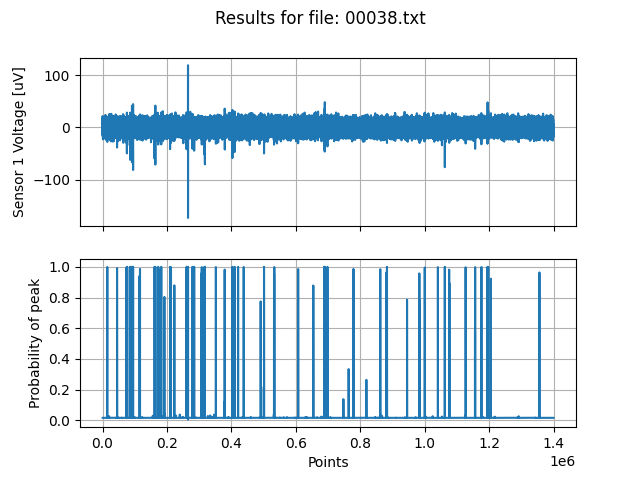

In [13]:
import nbformat

# Load the notebook file to inspect its content
notebook_path = './NN_LFEUI_test.ipynb'
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Extract all cells to inspect if any widget or output is recoverable
cells_with_widgets = []
for cell in notebook_content['cells']:
    if 'outputs' in cell:
        for output in cell['outputs']:
            if 'application/vnd.jupyter.widget-view+json' in output.get('data', {}):
                cells_with_widgets.append(cell)

# Return results to see if any widget-related content exists in the notebook
len(cells_with_widgets), cells_with_widgets[:1]  # Show one as an example if widgets are found

In [14]:
# Search for cells with static images or recoverable plot data in the notebook outputs
import base64

# Function to extract static images or embedded data from outputs
def extract_static_images_and_data(notebook_content):
    static_images = []
    embedded_data = []
    
    for cell in notebook_content['cells']:
        if 'outputs' in cell:
            for output in cell['outputs']:
                # Check for image data (e.g., PNG or SVG)
                if 'image/png' in output.get('data', {}):
                    static_images.append(output['data']['image/png'])
                if 'image/svg+xml' in output.get('data', {}):
                    static_images.append(output['data']['image/svg+xml'])
                
                # Check for embedded text data (e.g., plain text, JSON, etc.)
                if 'text/plain' in output.get('data', {}):
                    embedded_data.append(output['data']['text/plain'])
    
    return static_images, embedded_data

# Extract static images and data from the notebook
static_images, embedded_data = extract_static_images_and_data(notebook_content)

# Save static images to files for review
image_files = []
for i, img_data in enumerate(static_images):
    image_path = f"./static_image_{i+1}.png"
    with open(image_path, "wb") as img_file:
        img_file.write(base64.b64decode(img_data))
    image_files.append(image_path)

len(static_images), len(embedded_data), image_files  # Return counts and saved image paths

(2, 6, ['./static_image_1.png', './static_image_2.png'])